# Calculate the sigmoid functions
## Libraries

In [10]:
from pandas import DataFrame, read_csv
import datetime
import math
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import pylab
from scipy.optimize import curve_fit
import os

In [11]:
working_directory ='/Users/peter/python/pyBuurtwarmte'
os.chdir(working_directory)

In [14]:
# read the allocation data
file = "EvO_Gas_Allocation_2017.csv"
EvO_gas_alloc = pd.read_csv(file, index_col=False, header=None);
EvO_gas_alloc.columns = ['Date', 'Allocation']
EvO_gas_alloc['Date'] = EvO_gas_alloc['Date'].apply(lambda x: pd.to_datetime(str(x), format='%d/%m/%Y'))
EvO_gas_alloc.set_index('Date', inplace=True)

In [23]:
# read the effective temperature data
file = "KNMI_Teff_2012_2017.csv"
KNMI_Teff = pd.read_csv(file, index_col=0, header=0);

In [27]:
# copy only year 2017 into new data frame
KNMI_Teff_2017 = KNMI_Teff.loc['2017-01-01':'2017-12-31']

In [29]:
# add new column with 2017 effective temperature data to allocation data table
EvO_gas_alloc['Teff_lag'] = KNMI_Teff_2017['Teff_lag']

In [38]:
#EvO_gas_alloc

In [32]:
# read the customer number data for 2017
file = "EvO_Gas_Customer_2017.csv"
EvO_gas_customers = pd.read_csv(file, index_col=False, header=None);
EvO_gas_customers.columns = ['Date', 'Customers']
EvO_gas_customers['Date'] = EvO_gas_customers['Date'].apply(lambda x: pd.to_datetime(str(x), format='%d/%m/%Y'))
EvO_gas_customers.set_index('Date', inplace=True)

In [33]:
EvO_gas_customers

,Customers
Date,
2017-01-01,3015
2017-02-01,3057
2017-03-01,3114
2017-04-01,3178
2017-05-01,3293
2017-06-01,3366
2017-07-01,3417
2017-08-01,3480
2017-09-01,3514


In [62]:
EvO_gas_alloc

,Allocation,Teff_lag,Customers,Allocation_corr
Date,,,,
2017-01-01,28683.80931,-1.320896,1.000000,28683.809310
2017-01-02,29712.64248,-0.371042,1.000000,29712.642480
2017-01-03,28643.28950,0.357375,1.000000,28643.289500
2017-01-04,29405.05342,0.098052,1.000000,29405.053420
2017-01-05,34851.57266,-1.494677,1.000000,34851.572660
2017-01-06,40434.59331,-3.802271,1.000000,40434.593310
2017-01-07,34741.39919,-3.513135,1.000000,34741.399190
2017-01-08,27442.90630,-0.980740,1.000000,27442.906300
2017-01-09,28132.75431,0.189813,1.000000,28132.754310


In [60]:
for i in EvO_gas_alloc.index:
    
    month_nr = i.month
    customer_nr = 0
    for j in EvO_gas_customers.index:
        if j.month == 1:
            base_customer_nr = EvO_gas_customers.loc[j, 'Customers']
        if j.month == month_nr:
            customer_nr =  EvO_gas_customers.loc[j, 'Customers']
    
    EvO_gas_alloc.loc[i, 'Allocation_corr'] = base_customer_nr / customer_nr * EvO_gas_alloc.loc[i, 'Allocation']

In [66]:
EvO_gas_alloc

In [109]:
EvO_gas_alloc['Allocation_400_1200'] = EvO_gas_alloc['Allocation_corr'] \
#                                     * (400 / EvO_gas_customers.loc['2017-01-01'].at['Customers']) \
#                                    * (1200 / Total_gas_corr)

In [110]:
EvO_gas_alloc

,Allocation,Teff_lag,Customers,Allocation_corr,Allocation_400_1200
Date,,,,,
2017-01-01,28683.80931,-1.320896,1.000000,28683.809310,28683.809310
2017-01-02,29712.64248,-0.371042,1.000000,29712.642480,29712.642480
2017-01-03,28643.28950,0.357375,1.000000,28643.289500,28643.289500
2017-01-04,29405.05342,0.098052,1.000000,29405.053420,29405.053420
2017-01-05,34851.57266,-1.494677,1.000000,34851.572660,34851.572660
2017-01-06,40434.59331,-3.802271,1.000000,40434.593310,40434.593310
2017-01-07,34741.39919,-3.513135,1.000000,34741.399190,34741.399190
2017-01-08,27442.90630,-0.980740,1.000000,27442.906300,27442.906300
2017-01-09,28132.75431,0.189813,1.000000,28132.754310,28132.754310


In [77]:
def fsigmoid(T, a, b, c, d):
     y = a / (1 + (b/(T-40)) ** c) + d
     return y

In [130]:
popt, pcov = curve_fit(fsigmoid, x_data, y_data, bounds=([ 0., -41., 0., 0],[np.inf, -35., np.inf, np.inf]))

In [131]:
print(popt)
#print(popt[0])

[ 1.02280671e-02 -3.90853709e+01  7.13686542e+00  2.84261434e-04]


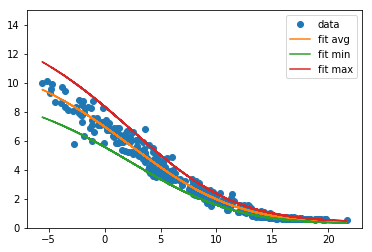

In [132]:
x = x_data
#y = fsigmoid(x, 4.11, -39.4, 7.61, 0.169)
y = fsigmoid(x, popt[0], popt[1], popt[2], popt[3])
#print(y)
pylab.plot(x_data, 1200*y_data, 'o', label='data')
pylab.plot(x,1200*1.0*y, label='fit avg')
pylab.plot(x,1200*0.8*y, label='fit min')
pylab.plot(x,1200*1.2*y, label='fit max')
pylab.ylim(0, 15)
pylab.legend(loc='best')
pylab.show()